In [1]:
## this makes figure 13 of the LVDB overview paper 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table


In [3]:
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
dwarf_all = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_all.csv')
lf_distant = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field_distant.csv')

In [5]:
x = ['ref_proper_motion']
dwarf_all.remove_columns(x)
lf_distant.remove_columns(x)
comb = table.vstack((dwarf_all, lf_distant))
comb['mass_HI_ul'] = np.log10(235600*comb['flux_HI_ul']*(comb['distance']/1000.)**2)
comb['ratio_HI_mstar_ul'] = 235600*comb['flux_HI_ul']*(comb['distance']/1000.)**2/10**comb['mass_stellar']

comb['distance_GC_M31'] = np.zeros(len(comb), dtype=float)
for i in range(len(comb)):
    comb['distance_GC_M31'][i] = np.min([comb['distance_gc'][i], comb['distance_m31'][i]])

/var/folders/xw/lxf9f3tx4z519xl72nm3_nn00000gn/T/ipykernel_17111/3345814549.py:5: RuntimeWarning: divide by zero encountered in log10
  comb['mass_HI_ul'] = np.log10(235600*comb['flux_HI_ul']*(comb['distance']/1000.)**2)


In [6]:
comb_lg = comb[comb['distance']<3000]

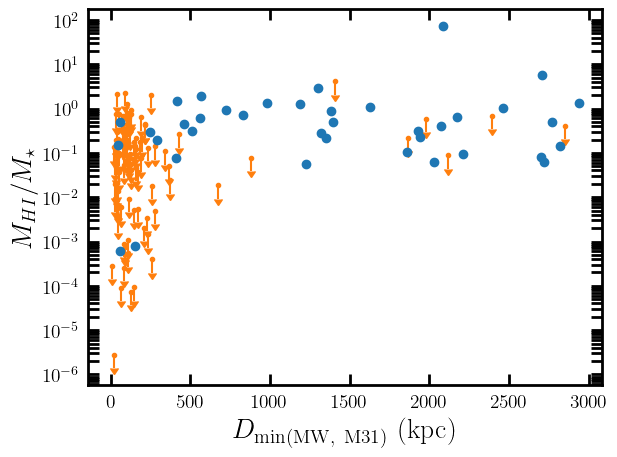

In [7]:
plt.errorbar(comb_lg['distance_GC_M31'], 10**comb_lg['mass_HI']/10**comb_lg['mass_stellar'], fmt='o', label=r'${\rm Satellite}$', c='tab:blue', zorder=1000)
plt.errorbar(comb_lg['distance_GC_M31'],comb_lg['ratio_HI_mstar_ul'], fmt='.', uplims=True, yerr=comb_lg['ratio_HI_mstar_ul']/2., c='tab:orange')

plt.gca().set_yscale('log')

plt.gca().set_ylabel(r'$M_{H I}/M_{\star}$')
plt.gca().set_xlabel(r'$D_{\rm min(MW,~M31)}~({\rm kpc})$')

plt.tight_layout()
plt.savefig('plots/distance_ratio_gas_stellar.pdf')
plt.show()